In [1]:
from __future__ import division
import itertools
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

P(miss 1) = 5/6

P(miss 2) = 4/6 + 1/6*P(miss 1)

P(miss 3) = 3/6 + 1/6 * P(miss 2) + 1/6 P(miss 1)

...

In [2]:
pmiss = [ 5/6 ]
for i in range(1000):
   pmiss.append(max(0, (6 - i - 2)/6) + sum(pmiss[-6:])/6)


In [3]:
pmiss[0:10]

[0.8333333333333334,
 0.8055555555555556,
 0.7731481481481481,
 0.7353395061728395,
 0.6912294238683128,
 0.6397676611796982,
 0.7463956047096479,
 0.731905983272367,
 0.7196310545585023,
 0.7107115389602279]

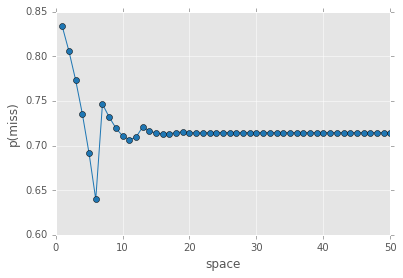

In [4]:
pmiss_cut = pmiss[0:50]
spaces = np.arange(len(pmiss_cut)) + 1
plt.plot(spaces, pmiss_cut, '-o')
plt.xlabel("space")
plt.ylabel("p(miss)")

```
P(miss n1 and miss n2) = P(miss n2) - P(miss n2|hit n1) * P(hit n1)
                       = P(miss n2) - P(miss [n2-n1]) * (1 - P(miss n1))

P(miss n1 and miss n2 and miss n3) = P(miss n2 and n3) - P(miss [n2-n1] and miss [n3-n1]) * P(hit n1)
```

In [5]:
def pmiss2(n1,n2):
    return pmiss[n2] - pmiss[n2-n1-1] * (1 - pmiss[n1])

def pmiss3(n1,n2,n3):
    return pmiss2(n2,n3) - pmiss2(n2-n1-1, n3-n1-1) * (1 - pmiss[n1])

In [6]:
out = []
for x,y,z in itertools.product(range(100),range(100),range(100)):
    if x < y < z:
        out.append([(x+1, y+1, z+1), pmiss3(x,y,z)])

In [7]:
pdeath = [ l[1] for l in out ]
print "i want to live:"
print out[np.argmin(pdeath)]
print "i want to die:"
print out[np.argmax(pdeath)]

i want to live:
[(4, 5, 6), 0.20601851851851846]
i want to die:
[(1, 2, 7), 0.5245627572016461]


In [8]:
out_no_adjacent = []
for x,y,z in itertools.product(range(100),range(100),range(100)):
    if x + 1 < y and y + 1 < z:
        out_no_adjacent.append([(x+1, y+1, z+1), pmiss3(x,y,z)])

In [9]:
pdeath_no_adjacent = [ l[1] for l in out_no_adjacent ]
print "i want to live:"
print out_no_adjacent[np.argmin(pdeath_no_adjacent)]
print "i want to die:"
print out_no_adjacent[np.argmax(pdeath_no_adjacent)]

i want to live:
[(6, 8, 10), 0.28627912570492287]
i want to die:
[(1, 3, 7), 0.49678497942386834]
